# 회귀 

## 01 회귀 소개

In [1]:
# 회귀 (Regression) :
#     데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법
#     여러 개의 독립변수(X)와 한 개의 종속변수(Y) 간의 상관관계를 모델링하는 기법

# 회귀 계수 (Regression coefficients) :
#     독립변수의 값에 영향을 미침(W)
#     최적의 회귀 계수 찾기가 핵심!
#    1. 선형의 유무 _ 선형 회귀 / 비선형 회귀
#    2. 독립변수의 개수 _ 단일 회귀 (1개) / 다중 회귀 (여러 개)

In [1]:
# 선형 회귀 :
#     실제값과 예측값의 차이 (오류의 제곱값)를 최소화하는 직선형 회귀선을 최적화하는 방식
#     규제 (과적합 문제를 해결하기 위해 회귀 계수에 패널티 값을 적용하는 것) 방법에 따라 별도의 유형으로 나뉨
#    1. 일반 선형 회귀 _ 예측값과 실제값의  잔차제곱합을 최소화할 수 있도록 회귀계수를 최적화하고, 규제 적용 안한 모델
#    2. 릿지 _ 선형회귀에 L2 규제 (상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해 회귀계수값을 더 작게 만드는 규제)를 추가한 모델
#    3. 라쏘 _ 선형회귀에 L1 규제 (예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 그 피처가 선택되지 않게 함 = 피처 선택 기능)
#    4. 엘라스틱넷 _ L2,L1 규제 합친 것 (L1 규제로 피터의 개수를 줄이고, L2 규제로 계수 값의 크기 조정)
#    5. 로지스틱 회귀 _ 분류에 사용되는 모델 (예측값이 이산형)

## 02 단순 선형 회귀를 통한 회귀 이해

In [2]:
# 단순 선형 회귀 : 
#     독립변수도 1개 , 종속변수도 1개
#     예측값 Y = W0 + W1*X
#     기울기 W1 , 절편 W0 가 회귀계수
 
# 잔차 :
#     실제값과 회귀모델의 차이에 따른 오류값
#     잔차의 합이 최소 = 최적의 회귀 모델
#     +, - 값 을 가질수 있음 = 1. 절댓값을 취해서 더하기 (MAE)
#                              2. 오류값의 제곱을 더하기 (RSS)

# RSS : 
#     회귀식의 W 변수 (회귀 계수)가 중심변수임
#     비용이며 W 변수로 구성되어 비용함수 (손실함수)라고도 함

# 머신러닝 회귀 알고리즘은
# 비용함수가 잔환하는값(= 오류값)을 지속해서 감소시키고, 
# 최종적으로 더 이상 감소하지 않는 최소의 오류값 구하는 것

## 03 비용 최소화하기 - 경사하강법(Gradient Descent) 소개

In [3]:
# 경사 하강법 :
#     고차원 방정식에 대한 문제를 해결해주며 비용함수 RSS를 최소화하는 방법
#     (점진적인 하강) _ 점진적으로 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서 오류값이 최소가 되는 W 파라미터 구하기 
#     예측값과 실제값의 차이가 작아지는 방향성을 가지고 W 파라미터를 지속해서 보정해감
#     오류값이 더이상 작아지지 않으면 그 오류값을 최소비용으로 판단해 그 때의 W값을 최적 파라미터로 반환

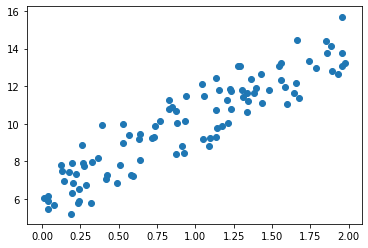

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4x +6 을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦.
X = 2 * np.random.rand(100,1)
y = 6+ 4*X+np.random.randn(100,1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

In [11]:
def get_cost(y, y_pred):
    N =len(y)
    cost = np.sum(np.square(y -y_pred))/N
    return cost

In [20]:
# w1과 s0를 업데이트 할 w1_update, w0_update를 반환
def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
    N=len(y)
    # 먼저 w1_update, w0_update를 각각 w1,w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
    
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))
    
    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T,diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T,diff))
    
    return w1_update, w0_update    

In [21]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함.
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화.
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해  w1,w0 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1,w0

In [22]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

w1,w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0],w0[0,0]))
y_pred = w1[0,0]*X +w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


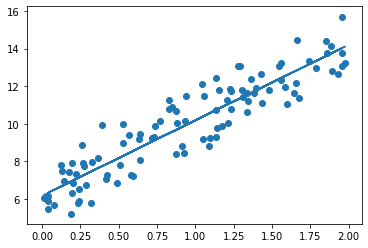

In [23]:
plt.scatter(X,y)
plt.plot(X,y_pred)

In [26]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size 만큼 추출해 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1= w1-w1_update
        w0 = w0- w0_update
        
    return w1,w0

In [28]:
w1,w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:", round(w1[0,0], 3), "w0:", round(w0[0,0], 3))
y_pred = w1[0,0]*X +w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


## 04 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

### 회귀 평가 지표

In [30]:
# MAE : 실제값과 예측값의 차이를 절댓값으로 변환하여 평균구하기
# MSE : 실제값과 예측값의 차이를 제곱해 평균구하기
# RMSE : MSE값은 실제오류평균보다 커지므로 MSE 값에 루트 씌운 것
# R제곱 : 실제값의 분산 대비 예측값의 분산 비율, 1에 가까울수록 예측 정확도가 높다

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이터 세트 로드
boston = load_boston()

# boston 데이터 세트 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

# boston 데이터 세트의 target 배열은 주택 가격임. 이를 PRICE 칼럼으로 DataFrame에 추가함
bostonDF['PRICE']=boston.target
print('Boston 데이터 세트 크기:',bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


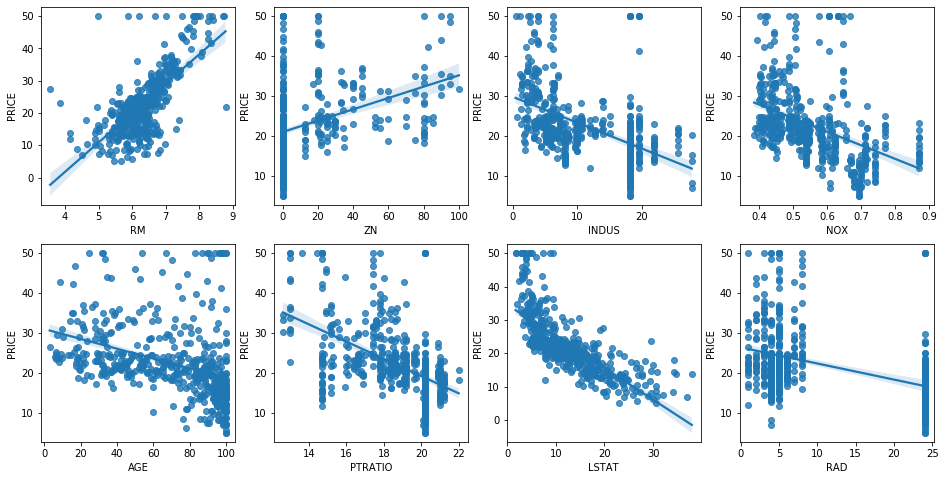

In [33]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data= bostonDF.drop(['PRICE'],axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE:{0:.3f}, RMSE:{1:.3f}'.format(mse, rmse))
print('Variance score :{0:.3f}'.format(r2_score(y_test, y_preds)))

MSE:17.297, RMSE:4.159
Variance score :0.757


In [38]:
print('절편값:',lr.intercept_)
print('회귀 계수값:',np.round(lr.coef_,1))

절편값: 40.995595172164336
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [39]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Serise로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [41]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error",cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print('5 folds 의 개별 negative MSE scores:', np.round(neg_mse_scores, 2))
print('5 folds 의 개별 RMSE scores:',np.round(rmse_scores, 2))
print('5 folds 의 평균 RMSE :{0:.3f}'.format(avg_rmse))

5 folds 의 개별 negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds 의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds 의 평균 RMSE :5.829


## 05 다항회귀와 과(대)적합/과소적함 이해

### 다항회귀이해

In [44]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]dml 2x2 행렬 생성
X=np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n',X)

# degree = 2인 2차 다항식으로 변환하기 위해 polynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n',poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [45]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 +4*X[:,1]**3
    return y

X =np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n',X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [46]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n',np.round(model.coef_,2))
print('Polynomial 회귀 shape:', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 shape: (10,)


In [51]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y= 1+ 2*X[:,0] +3*X[:,0]**2 + 4*X[:,1]**3
    return y
# Pipline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression 을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear',LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)

print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_,2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
    return np.cos(1.5*np.pi*X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다
np.random.seed(0)
n_samples =30
X = np.sort(np.random.rand(n_samples))

# y값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동값을 더한 값입니다
y=true_fun(X) + np.random.randn(n_samples) *0.1


Degree 1 회귀 계수는 [-1.61]입니다.
Degree 1 MSE는 0.40772896250986834 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26]입니다.
Degree 4 MSE는 0.04320874987231747 입니다.

Degree 15 회귀 계수는 [-2.98295000e+03  1.03899930e+05 -1.87417069e+06  2.03717225e+07
 -1.44873988e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08]입니다.
Degree 15 MSE는 182815433.47648773 입니다.


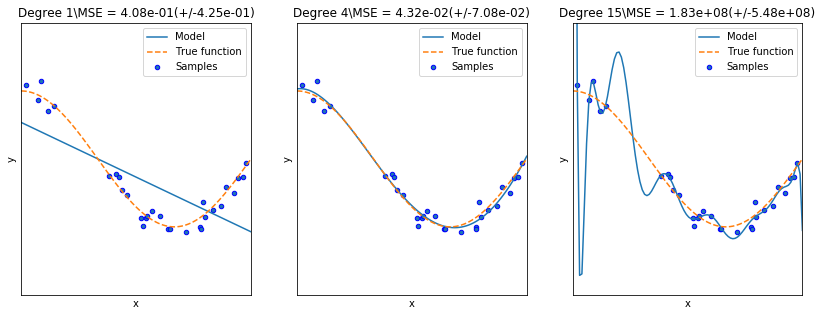

In [58]:
plt.figure(figsize=(14,5))
degrees = [1,4,15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax,xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features",polynomial_features),
                        ("linear_regression",linear_regression)])
    pipeline.fit(X.reshape(-1,1),y)
    
    # 교차 검증으로 다항 회귀를 평가합니다
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1}입니다.'.format(degrees[i], np.round(coefficients,2)))
    print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i],-1*np.mean(scores)))
    
    # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    # 테스트 데이터 세트에 회귀예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다
    X_test = np.linspace(0,1,100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]),label="Model")
    # 실제값 곡선
    plt.plot(X_test, true_fun(X_test),'--',label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc="best")
    plt.title("Degree {}\MSE = {:.2e}(+/-{:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    

plt.show()    

### 편향-분산 트레이드 오프

In [59]:
# 모델이 한 방향성으로 치우친 경향 = 고편향성을 가짐
# 모델이 지나치게 높은 변동성을 가짐 = 고분산성을 가짐
# 일반적으로 편향과 분산은 반비례함
# 편향을 낮추고 분산을 높이면서 전체 오류가 낮아지는 "골디락스" 지점 

# 높은 편향/낮은 분산에서는 과소적합되기 쉬움
# 낮은 편향/높은 분산에서는 과적합되기 쉬움

## 07 로지스틱 회귀

In [60]:
# 로지스틱 회귀 :
#     선형회귀 방식을 분류에 적용한 알고리즘
#     가중치 변수가 선형인지 아닌지에 따라 회귀가 선형인지 아닌지 앎
#     학습을 통해 시그모이드 함수 최적선을 찾고 
#               이 시그모이드 함수의 반환값을 확률로 간주해 확률에 따라 분류 결정

# 시그모이드 함수 : 
#     y = 1 / 1 + e의 -x승
#     x의 값이 아무리 커지거나 작아져도 y값은 항상 0 ~ 1
#     커지면 1에 근사, 작아지면 0에 근사, x=0이면 0.5

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler()로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target,
                                                   test_size=0.3, random_state=0)

In [64]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용해 학습 및 예측 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# 정확도와 roc_acu 측정
print('accuracy:{:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc:{:0.3f}'.format(roc_auc_score(y_test, lr_preds)))

accuracy:0.977
roc_auc:0.972


In [65]:
# 로지스틱 주요 하이퍼 파라미터 : penalty, C
# penalty : 규제 유형 설정(L2, L1) _ 디폴트값 =L2
# C : 규제 강도 조절 값인 alpha값의 역수 _ C값이 작을수록 규제강도가 커짐

In [67]:
from sklearn.model_selection import GridSearchCV

params={'penalty':['l2','l1'],
        'C':[0.01,0.1,1,1,5,10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy',cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid_clf.best_params_,
                                                   grid_clf.best_score_))

최적 하이퍼 파라미터 :{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도 :0.975


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitF

## 09 회귀 실습 - 자전거 대여 수요 예측